# Week 4.1 - Introduction to Regression Analysis

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     222.6
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           3.09e-33
Time:                        16:32:25   Log-Likelihood:                 246.15
No. Observations:                 181   AIC:                            -488.3
Df Residuals:                     179   BIC:                            -481.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.1651      0.045     25.839

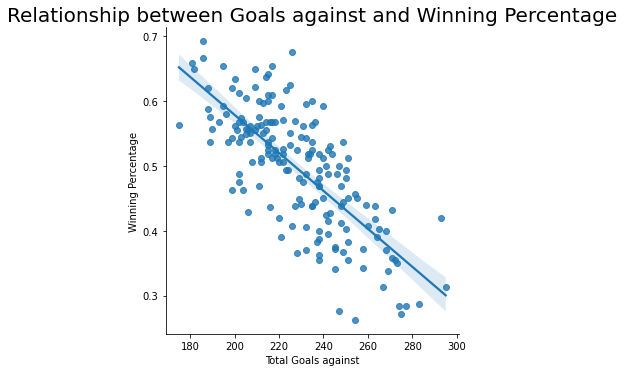

In [1]:
#Prerequisite Code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
NHL_Team_Stats=pd.read_csv("../../Data/Week 4/NHL_Team_Stats.csv")
NHL_Team_R_Stats=pd.read_csv("../../Data/Week 4/NHL_Team_R_Stats.csv")
NHL_Team_Stats.head()
import statsmodels.formula.api as sm
reg1 = sm.ols(formula = 'win_pct ~ goals_for', data= NHL_Team_R_Stats).fit()
import seaborn as sns
sns.lmplot(x='goals_against', y='win_pct',  data=NHL_Team_R_Stats)
plt.xlabel('Total Goals against')
plt.ylabel('Winning Percentage')
plt.title("Relationship between Goals against and Winning Percentage", fontsize=20)
NHL_Team_R_Stats['goals_against'].corr(NHL_Team_R_Stats['win_pct'])
reg2 = sm.ols(formula = 'win_pct ~ goals_against', data= NHL_Team_R_Stats).fit()
print(reg2.summary())

# Self Test - 1 Solution

Text(0.5, 1.0, 'Relationship between Average Goals for and Winning Percentage')

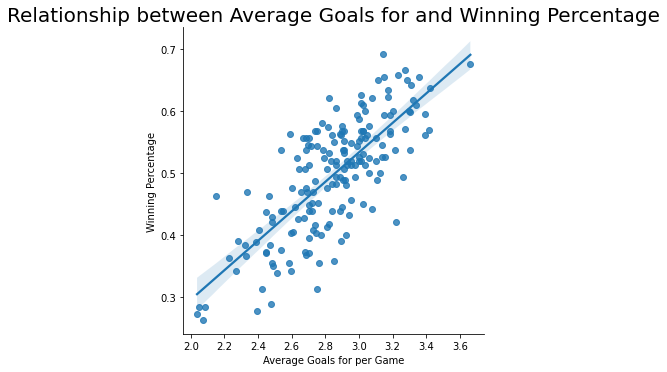

In [2]:
sns.lmplot(x='avg_gf', y='win_pct',  data=NHL_Team_R_Stats)
plt.xlabel('Average Goals for per Game')
plt.ylabel('Winning Percentage')
plt.title("Relationship between Average Goals for and Winning Percentage", fontsize=20)

In [3]:
reg3 = sm.ols(formula = 'win_pct ~ avg_gf', data= NHL_Team_R_Stats).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     240.1
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           6.66e-35
Time:                        16:32:30   Log-Likelihood:                 250.01
No. Observations:                 181   AIC:                            -496.0
Df Residuals:                     179   BIC:                            -489.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1804      0.044     -4.111      0.0

In [4]:
#Prerequisite Code
NHL_Team_Stats['type']=NHL_Team_Stats['type'].astype(object)
reg5 = sm.ols(formula = 'win_pct ~ avg_gf+type', data= NHL_Team_Stats).fit()
print(reg5.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     136.0
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           6.88e-45
Time:                        16:32:31   Log-Likelihood:                 320.28
No. Observations:                 369   AIC:                            -634.6
Df Residuals:                     366   BIC:                            -622.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0197      0.035     -0.558      0.5

## Self Test - 2 Solution
1. Run a regression where winning percentage is a function of average goals for, average goals against, and control for the different competitions.

2. Interpret the coefficients.

In [5]:
reg6 = sm.ols(formula = 'win_pct ~ avg_gf+avg_ga+competition_name', data= NHL_Team_Stats).fit()
print(reg6.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     73.95
Date:                Sun, 15 Dec 2024   Prob (F-statistic):          9.02e-105
Time:                        16:32:32   Log-Likelihood:                 498.58
No. Observations:                 369   AIC:                            -961.2
Df Residuals:                     351   BIC:                            -890.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [6]:
#Prerequisite Code
reg7 = sm.ols(formula = 'win_pct ~ avg_gf+type+avg_gf*type', data= NHL_Team_Stats).fit()
print(reg7.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     96.00
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           8.01e-46
Time:                        16:32:33   Log-Likelihood:                 325.08
No. Observations:                 369   AIC:                            -642.2
Df Residuals:                     365   BIC:                            -626.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.1748      0.061  

## Self Test - 3 Solution
#### Perform a similar exercise to find the relationship between the actual winning percentage and pythagorean winning percentage
1. In the NHL_Team_Stats data, create the pythagorean winning percentage=goals_for^2/(goals_for^2+goals_against^2), call this new variable "pyth_pct"
(In Python, ** is the operator for exponentiation. For example, the square of x would be x**2 in Python.)

In [7]:
NHL_Team_Stats['pyth_pct']=NHL_Team_Stats['goals_for']**2/(NHL_Team_Stats['goals_for']**2+NHL_Team_Stats['goals_against']**2)

2. Create a scatter plot to show the relationship between Pythagorean winning percentage and the actual winning percentage

Text(0.5, 1.0, 'Relationship between Pythagorean Winning Percentage and Winning Percentage')

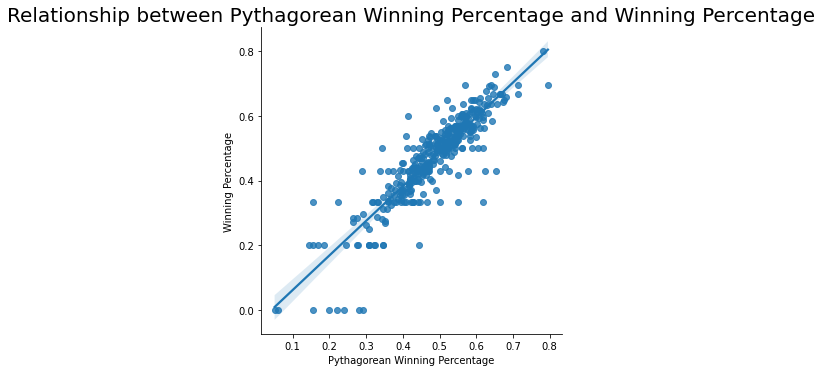

In [8]:
sns.lmplot(x='pyth_pct', y='win_pct',  data=NHL_Team_Stats)
plt.xlabel('Pythagorean Winning Percentage')
plt.ylabel('Winning Percentage')
plt.title("Relationship between Pythagorean Winning Percentage and Winning Percentage", fontsize=20)

3. Run a linear regression (reg8) where winning percentage is the dependent variable and Pythagorean winning percentage is the explanatory variable.
4. Interpret the estimate on the Pythagorean winning percentage and the goodness of fit of the regression model.

In [9]:
reg8 = sm.ols(formula = 'win_pct ~ pyth_pct', data= NHL_Team_Stats).fit()
print(reg8.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     1297.
Date:                Sun, 15 Dec 2024   Prob (F-statistic):          1.65e-122
Time:                        16:32:38   Log-Likelihood:                 496.63
No. Observations:                 369   AIC:                            -989.3
Df Residuals:                     367   BIC:                            -981.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0447      0.015     -3.052      0.0

5. Create a scatter plot to show the relationship between winning percentage and Pythagorean winning percentage, seperate the data points by the type of competition.

Text(0.5, 1.0, 'Relationship between Pythagorean Winning Percentage and Winning Percentage')

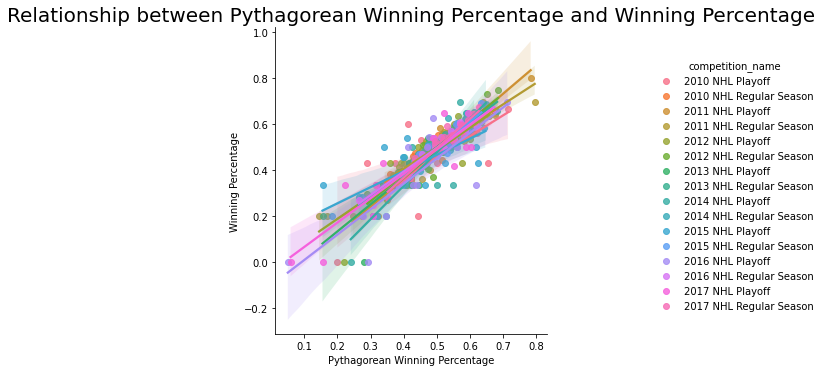

In [10]:
sns.lmplot(x='pyth_pct', y='win_pct', hue='competition_name',  data=NHL_Team_Stats)
plt.xlabel('Pythagorean Winning Percentage')
plt.ylabel('Winning Percentage')
plt.title("Relationship between Pythagorean Winning Percentage and Winning Percentage", fontsize=20)

6. Run a regression (reg9) where winning percentage is the dependent variable and Pythagorean winning percentage is the explanatory variable, controlling for the different competitions.
7. Interpret the estimate on the Pythagorean winning percentage and the goodness of fit of the regression model.

In [11]:
reg9 = sm.ols(formula = 'win_pct ~ pyth_pct+competition_name', data= NHL_Team_Stats).fit()
print(reg9.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     82.48
Date:                Thu, 02 Sep 2021   Prob (F-statistic):          1.94e-108
Time:                        20:20:23   Log-Likelihood:                 505.19
No. Observations:                 369   AIC:                            -976.4
Df Residuals:                     352   BIC:                            -909.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

8. Run a regression (reg10) where winning percentage is the dependent variable and Pythagorean winning percentage, competition, and the interaction between competition and Pythagorean are the explanatory variables
9. Interpret the estimate on the Pythagorean winning percentage and the goodness of fit of the regression model

In [12]:
reg10 = sm.ols(formula = 'win_pct ~ pyth_pct+competition_name+pyth_pct*competition_name', data= NHL_Team_Stats).fit()
print(reg10.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     45.21
Date:                Thu, 02 Sep 2021   Prob (F-statistic):          4.32e-101
Time:                        20:20:23   Log-Likelihood:                 520.45
No. Observations:                 369   AIC:                            -976.9
Df Residuals:                     337   BIC:                            -851.8
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

10. Discussion question: how well does Pythagorean winning percentage predicts the actual winning percentage based on our data?